In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline

#### Function definition

In [41]:
def read_from_file(filename) :
    f = open(filename, 'r')
    lines = f.readlines()

    #appnames = []
    contents = []
    log = ''
    capture = False

    for line in lines:
        #if(line.isspace()): continue

        if(('AUL Launching' in line or 'Fork Launching' in line) and 'tv-viewer' not in line):
            capture = True
            appname = line.split('\"')[1]
            
        if(capture == True and ('app_id' in line or 'launch app' in line or 'spend time for' in line)) :
            continue

        if(capture == True and 'stablised' in line):
            sec = float(line.split(' ')[-1][0:-4])
            contents.append({'appname': appname, 'log': log, 'sec': sec})
            log = ''
            capture = False
            
        if(capture is True):
            log += line
            
    f.close()
    return contents

In [369]:
def draw_single_chart(content, ax):
    frame = pd.read_csv(StringIO(content['log']), sep='\s+', skiprows=[0, 1])
    title = content['appname'] + ' ' + str(content['sec'])
    ax = frame[['tot.cpu', 'usr.cpu', 'kswapd']].plot(ax=ax, 
                                                      x=frame['time'], 
                                                      title=title, 
                                                      linewidth=2, 
                                                      ylim=(0, 105),
                                                      grid=True, 
                                                      legend=False)
    ax.annotate("launching finish",
                (content['sec'], 100),
                 xytext=(5, -15), 
                 textcoords='offset points')
    ymin, ymax = ax.get_ylim()
    ax.vlines(x=content['sec'], ymin=ymin, ymax=ymax-1, color='k', linewidth=2, linestyle='dashed')
    ax.set_xlabel("time (s)")
    ax.set_ylabel("cpu usage (%)")

In [370]:
def show(filename):
    contents = read_from_file(filename)
    
    fig, axes = plt.subplots(len(contents), 1, figsize=(12, 20))
    fig.subplots_adjust(hspace=0.7)

    for i, content in enumerate(contents):
        draw_single_chart(content, axes[i])

In [371]:
def launching_time(filename):
    contents = read_from_file(filename)
    for content in contents:
        print(content['sec'], end='\t')

In [382]:
def compare_all(filename1, filename2):
    contents1 = read_from_file(filename1)
    contents2 = read_from_file(filename2)
    
    number_of_chart = len(contents1) + len(contents2)
    
    fig, axes = plt.subplots(number_of_chart, 1, figsize=(12, number_of_chart * 2))
    fig.subplots_adjust(hspace=0.7)
    
    for i, (content1, content2) in enumerate(zip(contents1, contents2)):
        draw_single_chart(content1, axes[2*i])
        draw_single_chart(content2, axes[2*i+1])

In [383]:
def compare(filename1, filename2, select):
    contents1 = read_from_file(filename1)
    contents2 = read_from_file(filename2)
    
    number_of_chart = 2
    fig, axes = plt.subplots(number_of_chart, 1, figsize=(12, number_of_chart * 2), sharex=True)
    fig.subplots_adjust(hspace=0.7)
    
    for i, (content1, content2) in enumerate(zip(contents1, contents2)):
        if(select != None and select == i):
            draw_single_chart(content1, axes[0])
            draw_single_chart(content2, axes[1])

#### Main code

In [384]:
launching_time("log/test12.txt")

13.6	12.8	5.8	4.2	3.2	2.2	13.6	3.8	

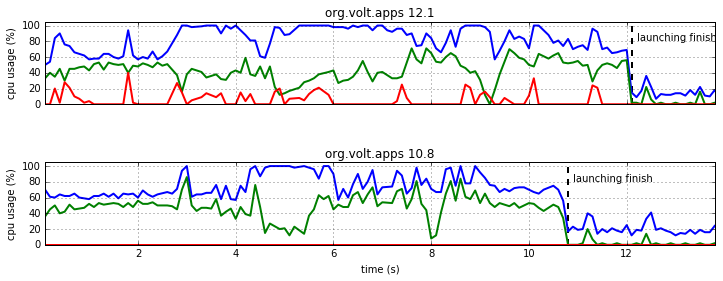

In [386]:
#show("log/test11.txt")
#compare_all("log/test11.txt", "log/test13.txt")
compare("log/test11.txt", "log/test13.txt", 1)